# TUG Test using LSTM model
LSTM models is used for time-sequential related. The walking time of patient is measure using the Timed Up and Go Test (TUG).

In [27]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#%pip install tensorflow
import tensorflow as tf

## Sample 1 - Self Collected Dataset

Step 1: Extract .json files into .csv files

In [29]:
# read json file for NP_side_1.mp4
import json

# image_id, category_id, keypoints, score, box, idx
f = open("D:/PD/outputs/Self Collected Dataset/data_keypoints/NP/NP_side_1.mp4/side_1.json")
data = json.load(f)

for i in data:
    print(i)

f.close()

{'image_id': '0.jpg', 'category_id': 1, 'keypoints': [1776.949462890625, 290.3154296875, 0.9367364645004272, 1795.511474609375, 277.9407653808594, 0.9571114778518677, 1770.7620849609375, 284.1280822753906, 0.9374991059303284, 1845.0101318359375, 296.5027770996094, 0.911241888999939, 1764.5748291015625, 302.6900939941406, 0.709499716758728, 1894.5089111328125, 383.12548828125, 0.8558382391929626, 1770.7620849609375, 401.6875, 0.9157924652099609, 1919.2581787109375, 506.8722229003906, 0.8913031816482544, 1752.2000732421875, 506.8722229003906, 0.8644285202026367, 1820.2608642578125, 537.8088989257812, 0.913506805896759, 1715.0760498046875, 550.18359375, 0.7937349677085876, 1882.1341552734375, 574.9329223632812, 0.7638155221939087, 1783.1368408203125, 574.9329223632812, 0.7995191812515259, 1727.4508056640625, 618.2443237304688, 0.8776913285255432, 1647.015380859375, 605.86962890625, 0.9335474371910095, 1733.6380615234375, 810.0517578125, 0.8783201575279236, 1653.2027587890625, 779.11505126

In [30]:
import csv

def extract_all_json_data(base_folder, output_csv):
    all_rows = []
    keypoint_len = 0
    box_len = 0
    for root, dirs, files in os.walk(base_folder):
        for fname in sorted(files):
            if fname.endswith('.json'):
                path = os.path.join(root, fname)
                with open(path) as f:
                    try:
                        frames = json.load(f)
                    except Exception as e:
                        print(f"Error reading {path}: {e}")
                        continue
                    if isinstance(frames, dict):
                        frames = [frames]
                    for frame in frames:
                        row = {
                            'file_id': os.path.splitext(fname)[0],
                            'image_id': frame.get('image_id', ''),
                            'category_id': frame.get('category_id', ''),
                            'score': frame.get('score', '')
                        }
                        # NP/PD label as before if needed
                        if os.sep + "NP" + os.sep in root + os.sep:
                            row['label'] = 0
                        elif os.sep + "PD" + os.sep in root + os.sep:
                            row['label'] = 1
                        # Flatten keypoints and box
                        if 'keypoints' in frame:
                            keypoints = frame['keypoints']
                            keypoint_len = max(keypoint_len, len(keypoints))
                            for i, v in enumerate(keypoints):
                                row[f'keypoint_{i}'] = v
                        if 'box' in frame:
                            box = frame['box']
                            box_len = max(box_len, len(box))
                            for i, v in enumerate(box):
                                row[f'box_{i}'] = v
                        all_rows.append(row)
    # Prepare column headers
    fieldnames = ['file_id', 'image_id', 'category_id', 'score', 'label'] \
                 + [f'keypoint_{i}' for i in range(keypoint_len)] \
                 + [f'box_{i}' for i in range(box_len)]
    # Write to CSV
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in all_rows:
            writer.writerow(row)

# Usage:
base_folder = "D:/PD/outputs/Self Collected Dataset/data_keypoints"
output_csv = "D:/PD/outputs/Self Collected Dataset/data_keypoints/processed.csv"
extract_all_json_data(base_folder, output_csv)
print(f"Data extracted to {output_csv}")

Data extracted to D:/PD/outputs/Self Collected Dataset/data_keypoints/processed.csv


Step 2: Import the processed csv file

In [31]:
df = pd.read_csv("D:/PD/outputs/Self Collected Dataset/data_keypoints/processed.csv")
df

,file_id,image_id,category_id,score,label,keypoint_0,keypoint_1,keypoint_2,keypoint_3,keypoint_4,...,keypoint_45,keypoint_46,keypoint_47,keypoint_48,keypoint_49,keypoint_50,box_0,box_1,box_2,box_3
0,side_1,0.jpg,1,3.064861,0,1776.949463,290.315430,0.936736,1795.511475,277.940765,...,1733.638062,810.051758,0.878320,1653.202759,779.115051,0.888933,1584.691895,242.672989,328.829102,633.583176
1,side_1,1.jpg,1,3.044587,0,1772.542236,297.033234,0.933447,1797.218018,278.526428,...,1735.528564,815.224243,0.875662,1655.332397,778.210571,0.898846,1589.356079,243.363480,323.189697,631.699387
2,side_1,2.jpg,1,3.040520,0,1772.882080,297.060272,0.937124,1797.643188,278.489471,...,1735.740479,817.042908,0.873410,1649.076782,779.901306,0.892036,1589.388550,243.204956,323.655273,633.883484
3,side_1,3.jpg,1,3.068251,0,1778.147827,295.277008,0.948588,1796.807983,276.616913,...,1734.607666,811.539734,0.878102,1653.747192,774.219543,0.880930,1583.892090,241.162659,332.531250,636.931519
4,side_1,4.jpg,1,3.068003,0,1776.623413,294.831390,0.949706,1795.289429,282.387421,...,1733.069580,817.478333,0.879155,1652.183716,780.146423,0.873484,1579.648193,240.700073,337.952759,637.131592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16402,PD_side_8,3263.jpg,1,3.037422,1,331.094299,472.632385,0.944869,336.635468,461.550079,...,403.129242,860.512756,0.914392,347.717773,899.300781,0.812445,141.266983,391.177490,363.031265,567.413513
16403,PD_side_8,3264.jpg,1,3.043385,1,331.179413,471.806122,0.942025,336.740112,460.684753,...,403.468414,855.493835,0.922142,347.861481,894.418640,0.815027,141.331039,390.063995,363.014664,569.414764
16404,PD_side_8,3265.jpg,1,3.043093,1,332.211853,471.212189,0.929804,337.780518,460.074829,...,404.604645,855.450867,0.932653,348.917877,900.000305,0.831495,142.784409,389.352600,362.148819,570.232544
16405,PD_side_8,3266.jpg,1,3.046185,1,327.448456,471.133331,0.928768,338.564758,460.017029,...,405.262604,854.645996,0.908813,349.681061,899.111206,0.805914,144.321869,389.428436,360.695007,569.154999


## Data Dictionary
- **file_ID:** Name of the source file (without extension).
- **image_id:** Identifier or filename of the original image.
- **category_id:** Object category ID (1 for person).
- **score:** Confidence score of the detection or prediction, ranges from 0 to 1
- **label:** Class label assigned by folder (0 for NP, 1 for PD).
- **keypoint_N:** Flattened coordinates and confidence for each keypoint. [x-coordinate, y-coordinate, and confidence]
- **box_N:** Flattened bounding box values for the detected object. [x_min, y_min, x_max, y_max]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16407 entries, 0 to 16406
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   file_id      16407 non-null  object 
 1   image_id     16407 non-null  object 
 2   category_id  16407 non-null  int64  
 3   score        16407 non-null  float64
 4   label        16407 non-null  int64  
 5   keypoint_0   16407 non-null  float64
 6   keypoint_1   16407 non-null  float64
 7   keypoint_2   16407 non-null  float64
 8   keypoint_3   16407 non-null  float64
 9   keypoint_4   16407 non-null  float64
 10  keypoint_5   16407 non-null  float64
 11  keypoint_6   16407 non-null  float64
 12  keypoint_7   16407 non-null  float64
 13  keypoint_8   16407 non-null  float64
 14  keypoint_9   16407 non-null  float64
 15  keypoint_10  16407 non-null  float64
 16  keypoint_11  16407 non-null  float64
 17  keypoint_12  16407 non-null  float64
 18  keypoint_13  16407 non-null  float64
 19  keyp

Step 3: Data Preprocessing (Prepare Data for LSTM)

In [33]:
# feature selection
# 1. Select only keypoint columns for features
keypoint_cols = [col for col in df.columns if col.startswith('keypoint_')]
df[keypoint_cols] = df[keypoint_cols].astype(float)

In [34]:
# 2. Create sequences FIRST (before any normalization to prevent data leakage)
from sklearn.preprocessing import StandardScaler

# Group by file_id to create sequences before any processing
sequences_data = []
for file_id, group in df.groupby('file_id'):
    sequence_data = {
        'file_id': file_id,
        'keypoints': group[keypoint_cols].astype(float).values,
        'label': group['label'].iloc[0]
    }
    sequences_data.append(sequence_data)

print(f"Created {len(sequences_data)} video sequences")
print(f"Labels distribution: {[seq['label'] for seq in sequences_data]}")

# Now we'll do normalization AFTER train-test split in the next cell

Created 18 video sequences
Labels distribution: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [35]:
# 3. Split sequences at VIDEO level first (prevents data leakage)
from sklearn.model_selection import train_test_split

# Extract sequences and labels
X_sequences = [seq['keypoints'] for seq in sequences_data]
y_labels = [seq['label'] for seq in sequences_data]

# Split at video level to prevent leakage
X_train_seq, X_test_seq, y_train, y_test = train_test_split(
    X_sequences, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

print(f"Training videos: {len(X_train_seq)}")
print(f"Test videos: {len(X_test_seq)}")
print(f"Training labels: {np.bincount(y_train)}")
print(f"Test labels: {np.bincount(y_test)}")

Training videos: 14
Test videos: 4
Training labels: [8 6]
Test labels: [2 2]


In [36]:
# 4. Apply normalization correctly (fit on training, transform both)
import numpy as np

# Fit scaler ONLY on training data
scaler = StandardScaler()
X_train_flat = np.vstack(X_train_seq)  # Flatten all training sequences
scaler.fit(X_train_flat)

# Apply normalization to both train and test
X_train_normalized = []
for seq in X_train_seq:
    normalized_seq = scaler.transform(seq)
    X_train_normalized.append(normalized_seq)

X_test_normalized = []
for seq in X_test_seq:
    normalized_seq = scaler.transform(seq)
    X_test_normalized.append(normalized_seq)

# Pad sequences so all videos have the same number of frames
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train_normalized, padding='post', dtype='float32')
X_test = pad_sequences(X_test_normalized, padding='post', dtype='float32')
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f"Training input shape: {X_train.shape}")  # (num_videos, max_seq_len, num_features)
print(f"Test input shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Training input shape: (14, 2125, 51)
Test input shape: (4, 3277, 51)
Training labels shape: (14,)
Test labels shape: (4,)


In [37]:
# Outlier removal function
def remove_outliers(df, columns):
    mask = pd.Series([True] * len(df), index=df.index)
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= (df[column] >= lower) & (df[column] <= upper)
    return mask

# Get mask of rows to keep
outlier_mask = remove_outliers(df, keypoint_cols)

# Apply mask to original DataFrame to keep all columns
df_clean = df.loc[outlier_mask].reset_index(drop=True)

df_clean

,file_id,image_id,category_id,score,label,keypoint_0,keypoint_1,keypoint_2,keypoint_3,keypoint_4,...,keypoint_45,keypoint_46,keypoint_47,keypoint_48,keypoint_49,keypoint_50,box_0,box_1,box_2,box_3
0,side_1,0.jpg,1,3.064861,0,1776.949463,290.315430,0.936736,1795.511475,277.940765,...,1733.638062,810.051758,0.878320,1653.202759,779.115051,0.888933,1584.691895,242.672989,328.829102,633.583176
1,side_1,1.jpg,1,3.044587,0,1772.542236,297.033234,0.933447,1797.218018,278.526428,...,1735.528564,815.224243,0.875662,1655.332397,778.210571,0.898846,1589.356079,243.363480,323.189697,631.699387
2,side_1,2.jpg,1,3.040520,0,1772.882080,297.060272,0.937124,1797.643188,278.489471,...,1735.740479,817.042908,0.873410,1649.076782,779.901306,0.892036,1589.388550,243.204956,323.655273,633.883484
3,side_1,3.jpg,1,3.068251,0,1778.147827,295.277008,0.948588,1796.807983,276.616913,...,1734.607666,811.539734,0.878102,1653.747192,774.219543,0.880930,1583.892090,241.162659,332.531250,636.931519
4,side_1,4.jpg,1,3.068003,0,1776.623413,294.831390,0.949706,1795.289429,282.387421,...,1733.069580,817.478333,0.879155,1652.183716,780.146423,0.873484,1579.648193,240.700073,337.952759,637.131592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,PD_side_8,3261.jpg,1,3.050273,1,331.695770,474.120819,0.950022,337.190063,457.637939,...,403.121521,858.721008,0.928849,348.178650,897.181030,0.805272,143.091202,393.354797,360.726334,562.615234
7322,PD_side_8,3262.jpg,1,3.047595,1,336.505096,474.093597,0.942701,336.505096,457.567474,...,402.609589,859.703125,0.933070,347.522522,892.755371,0.815643,140.746750,393.115601,363.973221,564.091675
7323,PD_side_8,3265.jpg,1,3.043093,1,332.211853,471.212189,0.929804,337.780518,460.074829,...,404.604645,855.450867,0.932653,348.917877,900.000305,0.831495,142.784409,389.352600,362.148819,570.232544
7324,PD_side_8,3266.jpg,1,3.046185,1,327.448456,471.133331,0.928768,338.564758,460.017029,...,405.262604,854.645996,0.908813,349.681061,899.111206,0.805914,144.321869,389.428436,360.695007,569.154999


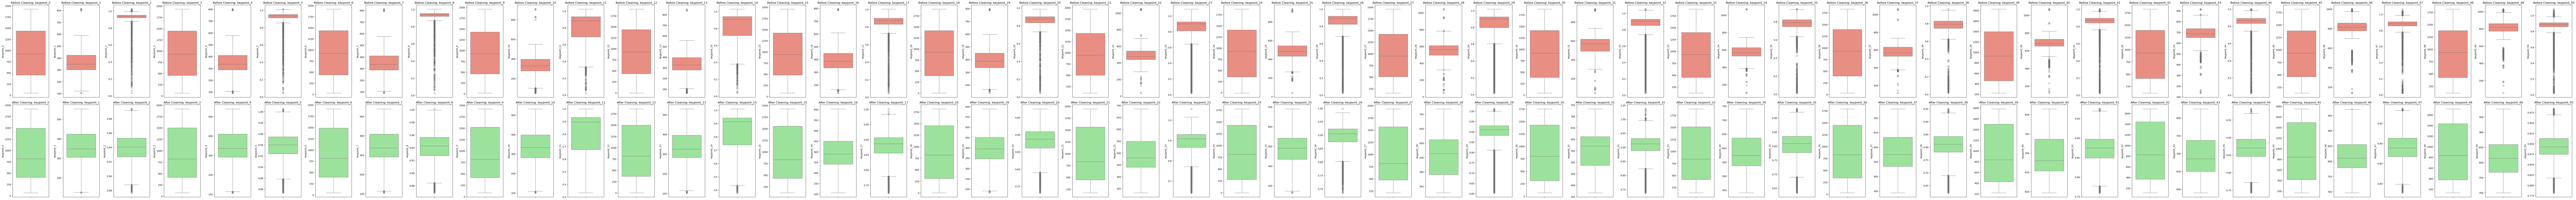

In [38]:
# data visualization before and after removing outliers
fig, axes = plt.subplots(2, len(keypoint_cols), figsize=(3*len(keypoint_cols), 12))

# If only one column, axes is not a 2D array, so we reshape
if len(keypoint_cols) == 1:
    axes = np.array([[axes[0]], [axes[1]]])

for i, col in enumerate(keypoint_cols):
    sns.boxplot(ax=axes[0, i], y=df[col], color="salmon")
    axes[0, i].set_title(f"Before Cleaning: {col}")
    sns.boxplot(ax=axes[1, i], y=df_clean[col], color="lightgreen")
    axes[1, i].set_title(f"After Cleaning: {col}")

plt.tight_layout()
plt.show()

In [39]:
print(df_clean.columns)

Index(['file_id', 'image_id', 'category_id', 'score', 'label', 'keypoint_0',
       'keypoint_1', 'keypoint_2', 'keypoint_3', 'keypoint_4', 'keypoint_5',
       'keypoint_6', 'keypoint_7', 'keypoint_8', 'keypoint_9', 'keypoint_10',
       'keypoint_11', 'keypoint_12', 'keypoint_13', 'keypoint_14',
       'keypoint_15', 'keypoint_16', 'keypoint_17', 'keypoint_18',
       'keypoint_19', 'keypoint_20', 'keypoint_21', 'keypoint_22',
       'keypoint_23', 'keypoint_24', 'keypoint_25', 'keypoint_26',
       'keypoint_27', 'keypoint_28', 'keypoint_29', 'keypoint_30',
       'keypoint_31', 'keypoint_32', 'keypoint_33', 'keypoint_34',
       'keypoint_35', 'keypoint_36', 'keypoint_37', 'keypoint_38',
       'keypoint_39', 'keypoint_40', 'keypoint_41', 'keypoint_42',
       'keypoint_43', 'keypoint_44', 'keypoint_45', 'keypoint_46',
       'keypoint_47', 'keypoint_48', 'keypoint_49', 'keypoint_50', 'box_0',
       'box_1', 'box_2', 'box_3'],
      dtype='object')


Step 4: Data Splitting (Train-test Split)

In [40]:
# Train-test split

print("Data preprocessing completed correctly!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print(f"Training class distribution: NP={np.sum(y_train==0)}, PD={np.sum(y_train==1)}")
print(f"Test class distribution: NP={np.sum(y_test==0)}, PD={np.sum(y_test==1)}")

Data preprocessing completed correctly!
X_train shape: (14, 2125, 51)
X_test shape: (4, 3277, 51)
y_train shape: (14,)
y_test shape: (4,)
Training class distribution: NP=8, PD=6
Test class distribution: NP=2, PD=2


Step 3: Build and Train LSTM Model

In [41]:
# Improved LSTM Model with Bidirectional layers and proper regularization
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Create improved model
def create_improved_model(input_shape):
    model = Sequential([
        Masking(mask_value=0., input_shape=input_shape),
        Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
        BatchNormalization(),
        Bidirectional(LSTM(32, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    return model

# Cross-validation with improved model
kf = KFold(n_splits=4, shuffle=True, random_state=42)
val_accuracies = []

print("Starting K-Fold Cross Validation with Improved Model...")

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining Fold {fold + 1}/4")
    
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_improved_model((X_train.shape[1], X_train.shape[2]))
    
    # Training with callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
    ]

    # Train the model
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=50, 
        batch_size=4,
        callbacks=callbacks,
        verbose=0
    )
    
    # Evaluate the model
    loss, acc, precision, recall = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    val_accuracies.append(acc)
    
    print(f"Fold {fold + 1} - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

print(f"\nCross-validation completed!")
print(f"Validation accuracies for each fold: {[f'{acc:.4f}' for acc in val_accuracies]}")
print(f"Average validation accuracy: {np.mean(val_accuracies):.4f} ± {np.std(val_accuracies):.4f}")

# Train final model on all training data
print(f"\nTraining final model on all training data...")
final_model = create_improved_model((X_train.shape[1], X_train.shape[2]))

callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-6, verbose=1)
]

Starting K-Fold Cross Validation with Improved Model...

Training Fold 1/4


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 - Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000

Training Fold 2/4
Fold 2 - Accuracy: 0.7500, Precision: 1.0000, Recall: 0.5000

Training Fold 3/4
Fold 3 - Accuracy: 0.3333, Precision: 0.0000, Recall: 0.0000

Training Fold 4/4
Fold 4 - Accuracy: 0.6667, Precision: 0.0000, Recall: 0.0000

Cross-validation completed!
Validation accuracies for each fold: ['0.5000', '0.7500', '0.3333', '0.6667']
Average validation accuracy: 0.5625 ± 0.1600

Training final model on all training data...


In [42]:
# Train the final model with proper validation
history = final_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # Use test set for final validation
    epochs=100,
    batch_size=4,
    callbacks=callbacks,
    shuffle=True,
    verbose=1
)

print("\nFinal model training completed!")

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.2857 - loss: 0.8155 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7001 - val_precision: 0.5000 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 10s/step - accuracy: 0.4286 - loss: 1.1323 - precision: 0.2500 - recall: 0.1667 - val_accuracy: 0.7500 - val_loss: 0.6704 - val_precision: 1.0000 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 10s/step - accuracy: 0.5714 - loss: 0.7951 - precision: 0.5000 - recall: 0.5000 - val_accuracy: 0.7500 - val_loss: 0.6555 - val_precision: 0.6667 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 11s/step - accuracy: 0.7857 - loss: 0.4778 - precision: 0.8000 - recall: 0.6667 - val_accuracy: 0.7500 - val_loss: 0.6366 - val_precision: 0.6667 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 10s/step - accuracy: 0.

Step 4: Evaluation LSTM Model

In [49]:
# Evaluate
results = model.evaluate(X_test, y_test)
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5000 - loss: 0.6419 - precision: 0.0000e+00 - recall: 0.0000e+00
loss: 0.6419
compile_metrics: 0.5000


In [50]:
# Proper evaluation metrics for binary classification
from sklearn.metrics import (classification_report, confusion_matrix, 
                            accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, roc_curve)
import seaborn as sns

def classification_evaluation(model, X_test, y_test, model_name="LSTM Model"):
    # Predictions
    y_pred_prob = model.predict(X_test, verbose=0).flatten()
    y_pred_class = (y_pred_prob > 0.5).astype(int)
    
    print(f"\n{'='*50}")
    print(f"{model_name.upper()} EVALUATION RESULTS")
    print(f"{'='*50}")
    
    # Classification metrics
    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"AUC-ROC:   {auc:.4f}")
    
    # Detailed classification report
    print(f"\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred_class, 
                              target_names=['Normal (NP)', 'Parkinson\'s (PD)']))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_class)
    
    plt.figure(figsize=(12, 4))
    
    # Plot 1: Confusion Matrix
    plt.subplot(1, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal (NP)', 'Parkinson\'s (PD)'],
                yticklabels=['Normal (NP)', 'Parkinson\'s (PD)'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Plot 2: ROC Curve
    plt.subplot(1, 3, 2)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Prediction Distribution
    plt.subplot(1, 3, 3)
    plt.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.7, label='Normal (NP)', color='blue')
    plt.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.7, label='Parkinson\'s (PD)', color='red')
    plt.axvline(x=0.5, color='black', linestyle='--', alpha=0.8, label='Threshold')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title(f'{model_name} - Prediction Distribution')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Clinical interpretation
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)  # Same as recall
    
    print(f"\nClinical Metrics:")
    print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
    print(f"Specificity (True Negative Rate): {specificity:.4f}")
    print(f"False Positive Rate: {fp/(fp+tn):.4f}")
    print(f"False Negative Rate: {fn/(fn+tp):.4f}")
    
    return {
        'accuracy': accuracy, 'precision': precision, 'recall': recall,
        'f1': f1, 'auc': auc, 'sensitivity': sensitivity, 'specificity': specificity
    }


IMPROVED BIDIRECTIONAL LSTM EVALUATION RESULTS
Accuracy:  0.7500
Precision: 1.0000
Recall:    0.5000
F1-Score:  0.6667
AUC-ROC:   1.0000

Detailed Classification Report:
                  precision    recall  f1-score   support

     Normal (NP)       0.67      1.00      0.80         2
Parkinson's (PD)       1.00      0.50      0.67         2

        accuracy                           0.75         4
       macro avg       0.83      0.75      0.73         4
    weighted avg       0.83      0.75      0.73         4



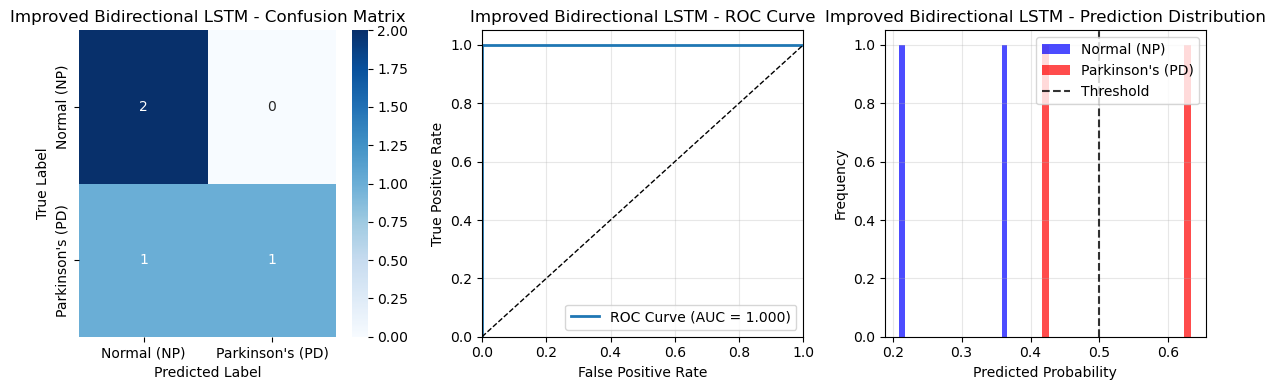


Clinical Metrics:
Sensitivity (True Positive Rate): 0.5000
Specificity (True Negative Rate): 1.0000
False Positive Rate: 0.0000
False Negative Rate: 0.5000


In [51]:
# Evaluate the improved model with proper classification metrics
results = classification_evaluation(final_model, X_test, y_test, "Improved Bidirectional LSTM")

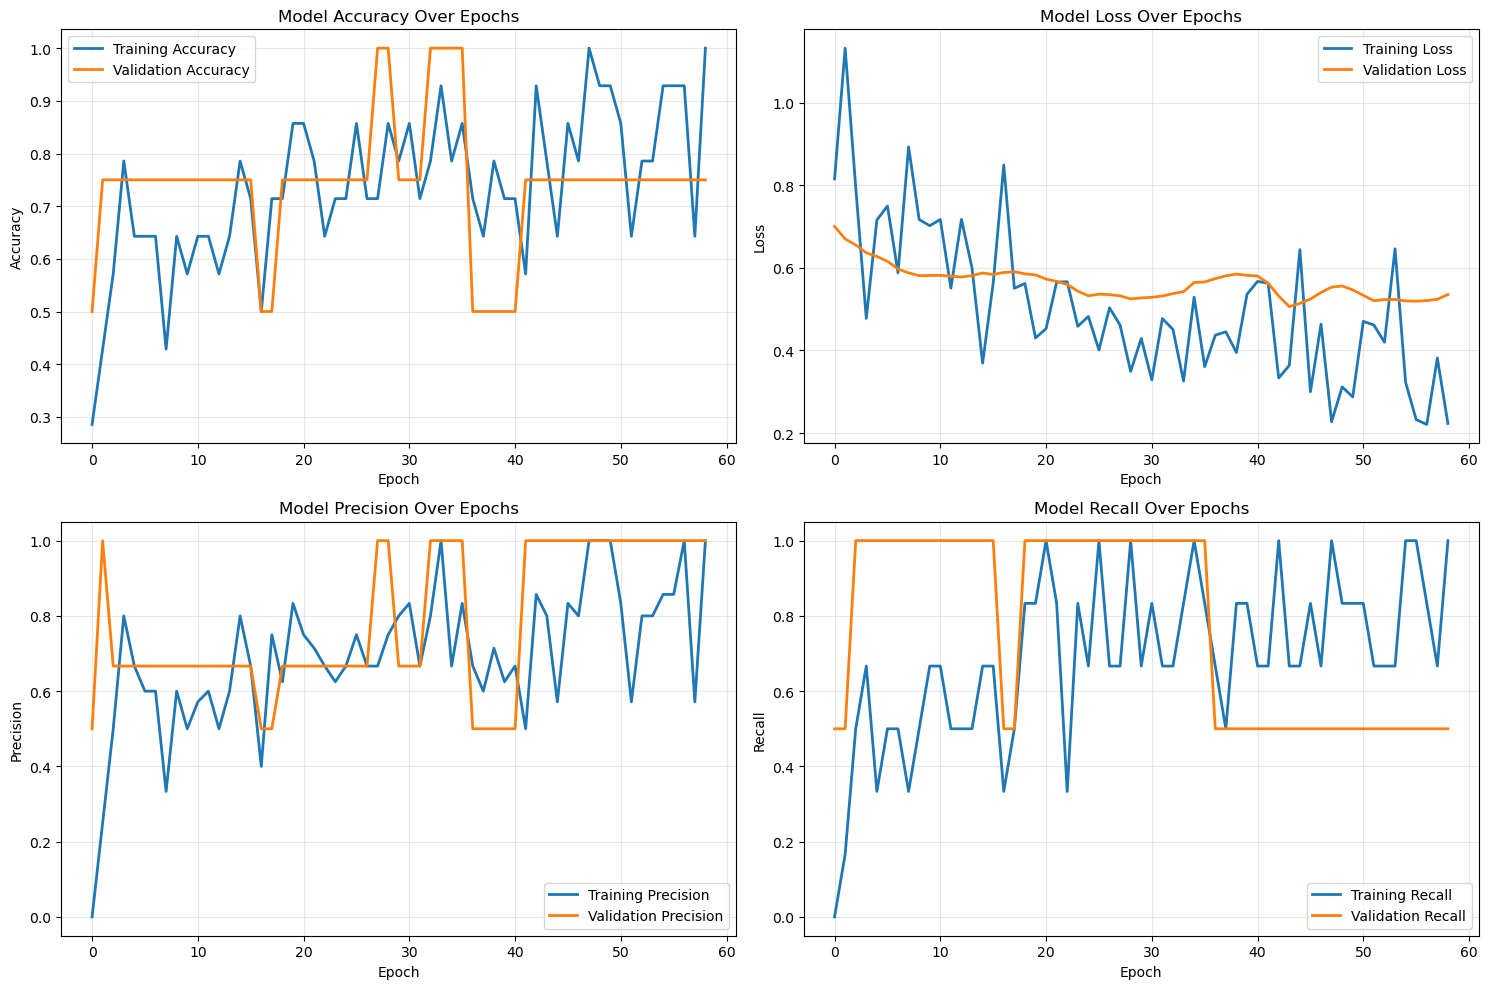

In [52]:
# Comprehensive training history visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0, 0].set_title('Model Accuracy Over Epochs')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Loss
axes[0, 1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0, 1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 1].set_title('Model Loss Over Epochs')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Precision
if 'precision' in history.history:
    axes[1, 0].plot(history.history['precision'], label='Training Precision', linewidth=2)
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision', linewidth=2)
    axes[1, 0].set_title('Model Precision Over Epochs')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# Recall
if 'recall' in history.history:
    axes[1, 1].plot(history.history['recall'], label='Training Recall', linewidth=2)
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall', linewidth=2)
    axes[1, 1].set_title('Model Recall Over Epochs')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()